<a href="https://colab.research.google.com/github/RAKHISHAKYA/credit-card-fraud-prediction/blob/main/Wine_Quality_Red.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CONTEXT**

Understanding wine quality involves examining multiple factors that contribute to the excellence of a wine, from grape variety and vineyard conditions to winemaking techniques. Quality wine is defined by its sensory attributes—appearance, aroma, taste, and mouthfeel—each of which reflects the interplay between environmental conditions and winemaking practices. Factors such as terroir, harvesting practices, fermentation methods, and aging processes play crucial roles in shaping a wine’s character. Evaluating wine quality involves both sensory analysis, where experts assess the wine's complexity and balance, and technical analysis, which includes testing chemical and microbial properties. Advances in technology, sustainability practices, and a commitment to continuous improvement are essential for enhancing wine quality. By exploring successful case studies and staying abreast of emerging trends, producers can refine their methods and achieve high standards in their wines.



**Definition** **of** **Wine** **Quality**:

Wine quality refers to the overall excellence and desirability of a wine, which encompasses taste, aroma, appearance, and other sensory attributes. It often reflects the wine’s complexity, balance, and harmony.


**Importance of Studying Wine Quality:**

Understanding wine quality is crucial for producers, sommeliers, and consumers. It influences production practices, pricing, and the reputation of wineries. High-quality wines also contribute to the cultural and economic value of the wine industry.






In [39]:
#IMPORT LIBRERIES
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**LOAD** **DATASET**


In [6]:
wq=pd.read_csv("/content/WineQT.csv")

**EDA**

In [7]:
wq.shape

(1143, 13)

In [8]:
wq.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
0         9.4        5     0  
1         9.8        5     1  
2         9.8        5     2  
3         9.8        6     3  
4         9.4        5     4  
...       ...      ...   ...  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597  

[1143 rows x 13 columns]>

In [9]:
wq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [10]:
wq.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [11]:
wq.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


#  Data Analysis and Visualization

In [12]:
wq.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


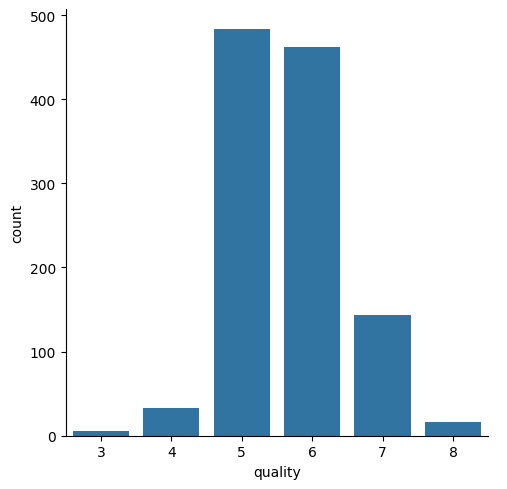

In [13]:
#no of valuesfor each quality
sns.catplot(x='quality',data=wq,kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

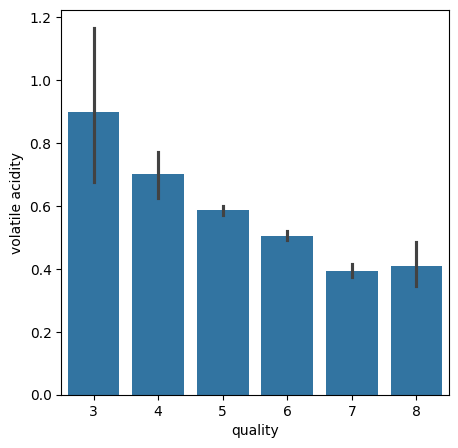

In [14]:
#volatile acidity vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity',data=wq)

<Axes: xlabel='quality', ylabel='citric acid'>

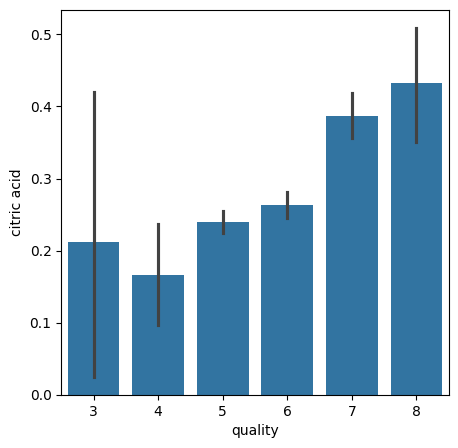

In [15]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid',data=wq)

<Axes: xlabel='quality', ylabel='chlorides'>

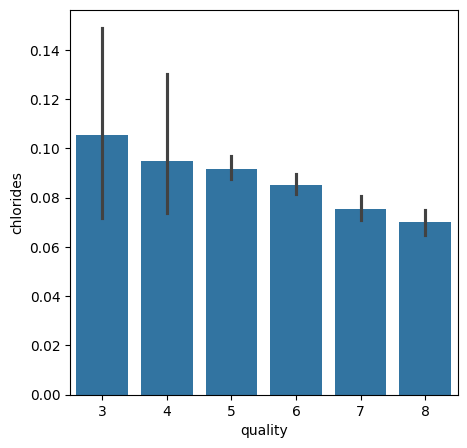

In [16]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='chlorides',data=wq)

# correlation

In [17]:
correlation =wq.corr()

<Axes: >

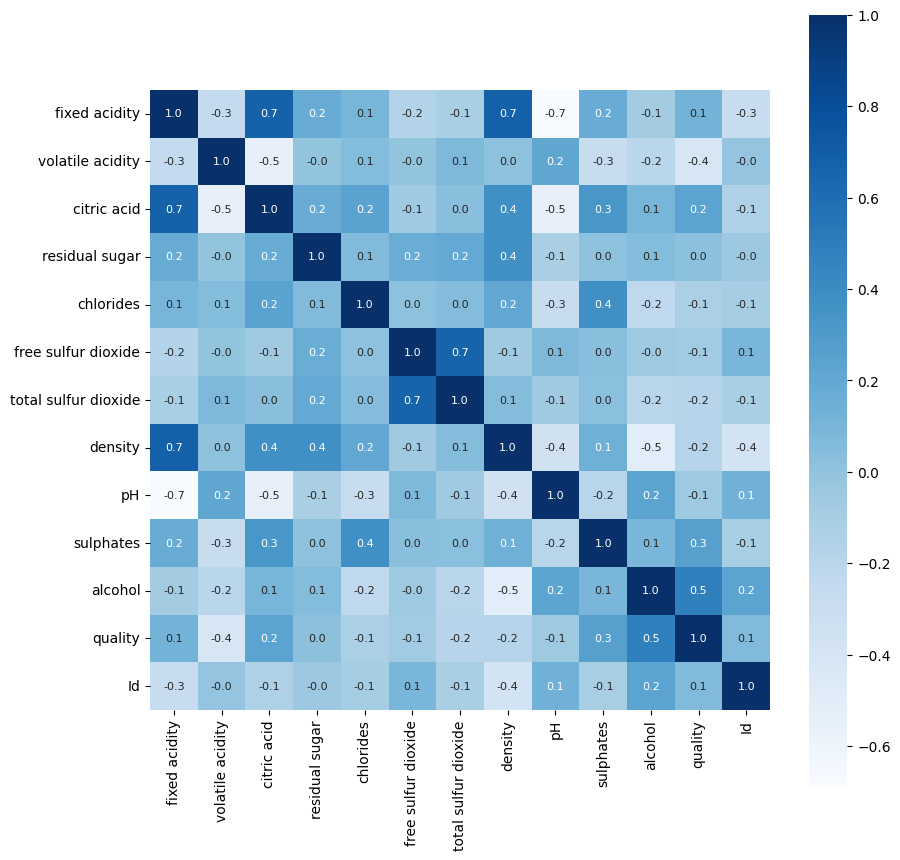

In [18]:
#heatmap tp understand the correlatin bet the column
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

#  Data Preprocessing

In [19]:
#seprate the data and level
X=wq.drop('quality',axis=1)

In [20]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

In [21]:
Y=wq['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [22]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int64


#  Train and test split

In [23]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size= 0.2, random_state=2)

In [24]:
print(Y.shape,Y_train.shape, Y_test.shape)

(1143,) (914,) (229,)


# Model Training

In [34]:
model=RandomForestClassifier()

In [35]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [36]:
X_test_prediction= model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction, Y_test)

In [37]:
print('Accuracy:', test_data_accuracy)

Accuracy: 0.9170305676855895


In conclusion, the wine quality project successfully identified key
factors influencing wine quality, such as acidity, sugar content, and alcohol levels.



 Through data analysis and modeling, we established a strong correlation between these variables and the overall quality ratings.

 The insights gained can guide winemakers in refining production processes to consistently achieve higher-quality wines. Further research could explore additional factors or variations across different wine types to enhance predictive accuracy.    